___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

In [12]:
import plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK. 
------------
### We also provide pickle file in the article lecture right before the video lectures.

In [13]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [14]:
# Bank of America
bac = data.DataReader("BAC", 'yahoo', start, end)

# CitiGroup
c= data.DataReader("C", 'yahoo', start, end)

# Goldman Sachs
gs = data.DataReader("GS", 'yahoo', start, end)

# JPMorgan Chase
jpm = data.DataReader("JPM", 'yahoo', start, end)

# Morgan Stanley
ms = data.DataReader("MS", 'yahoo', start, end)

# Wells Fargo
wfc  = data.DataReader("WFC", 'yahoo', start, end)

In [15]:
# Could also do this for a Panel Object
df = data.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'],'yahoo', start, end)

** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [16]:
df.head()

Attributes  Adj Close                                                \
Symbols           BAC           C          GS        JPM         MS   
Date                                                                  
2006-01-03  33.942654  365.387573  103.863960  26.345470  35.864334   
2006-01-04  33.582165  358.641815  102.429390  26.193419  35.888935   
2006-01-05  33.625427  360.420959  102.389091  26.272757  35.987347   
2006-01-06  33.574970  360.420959  103.839806  26.457863  36.024254   
2006-01-09  33.596588  358.715851  105.089043  26.887590  36.405586   

Attributes                 Close                                     ...  \
Symbols           WFC        BAC           C          GS        JPM  ...   
Date                                                                 ...   
2006-01-03  20.353487  47.080002  492.899994  128.869995  40.189999  ...   
2006-01-04  20.117414  46.580002  483.799988  127.089996  39.619999  ...   
2006-01-05  20.095081  46.639999  486.200012  127.040001  39.740002  ...   
2006-01-06  20.213110  46.570000  486.200012  128.839996  40.020000  ...   
2006-01-09  20.209930  46.599998  483.899994  130.389999  40.669998  ...   

Attributes        Open                                       Volume  \
Symbols             GS        JPM         MS        WFC         BAC   
Date                                                                  
2006-01-03  126.699997  39.830002  57.169998  31.600000  16296700.0   
2006-01-04  127.349998  39.779999  58.700001  31.799999  17757900.0   
2006-01-05  126.000000  39.610001  58.549999  31.500000  14970700.0   
2006-01-06  127.290001  39.919998  58.770000  31.580000  12599800.0   
2006-01-09  128.500000  39.880001  58.630001  31.674999  15619400.0   

Attributes                                                           
Symbols             C         GS         JPM         MS         WFC  
Date                                                                 
2006-01-03  1537600.0  6188700.0  12838600.0  5377000.0  11016400.0  
2006-01-04  1870960.0  4861600.0  13491500.0  7977800.0  10870000.0  
2006-01-05  1143160.0  3717400.0   8109400.0  5778000.0  10158000.0  
2006-01-06  1370210.0  4319600.0   7966900.0  6889800.0   8403800.0  
2006-01-09  1680740.0  4723500.0  16575200.0  4144500.0   5619600.0  

[5 rows x 36 columns]

In [17]:
tickers = ['bac', 'c', 'gs', 'jpm', 'ms', 'wfc']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [18]:
bank_stocks = pd.concat([bac, c, gs, jpm, ms, wfc],axis=1,keys=tickers)

** Set the column name levels (this is filled out for you):**

In [19]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [20]:
bank_stocks.head()

Bank Ticker        bac                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      c                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   33.942657  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   33.582180  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   33.625423  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   33.574966  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   33.596592  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         ms                                         wfc             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  35.864349  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  35.888939  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  35.987362  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  36.024242  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  36.405582  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.353487  
2006-01-04   31.799999  31.530001  10870000.0  20.117411  
2006-01-05   31.500000  31.495001  10158000.0  20.095076  
2006-01-06   31.580000  31.680000   8403800.0  20.213112  
2006-01-09   31.674999  31.674999   5619600.0  20.209929  

[5 rows x 36 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [34]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
bac     54.900002
c      564.099976
gs     247.919998
jpm     70.080002
ms      89.300003
wfc     58.520000
dtype: float64

In [58]:
df.xs

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [35]:
returns=pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [39]:
for tick in tickers:
    returns[tick+ 'Returns']=bank_stocks[tick]['Close'].pct_change()

In [50]:
returns.head()

,bacReturns,cReturns,gsReturns,jpmReturns,msReturns,wfcReturns
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

In [44]:
import seaborn as sns

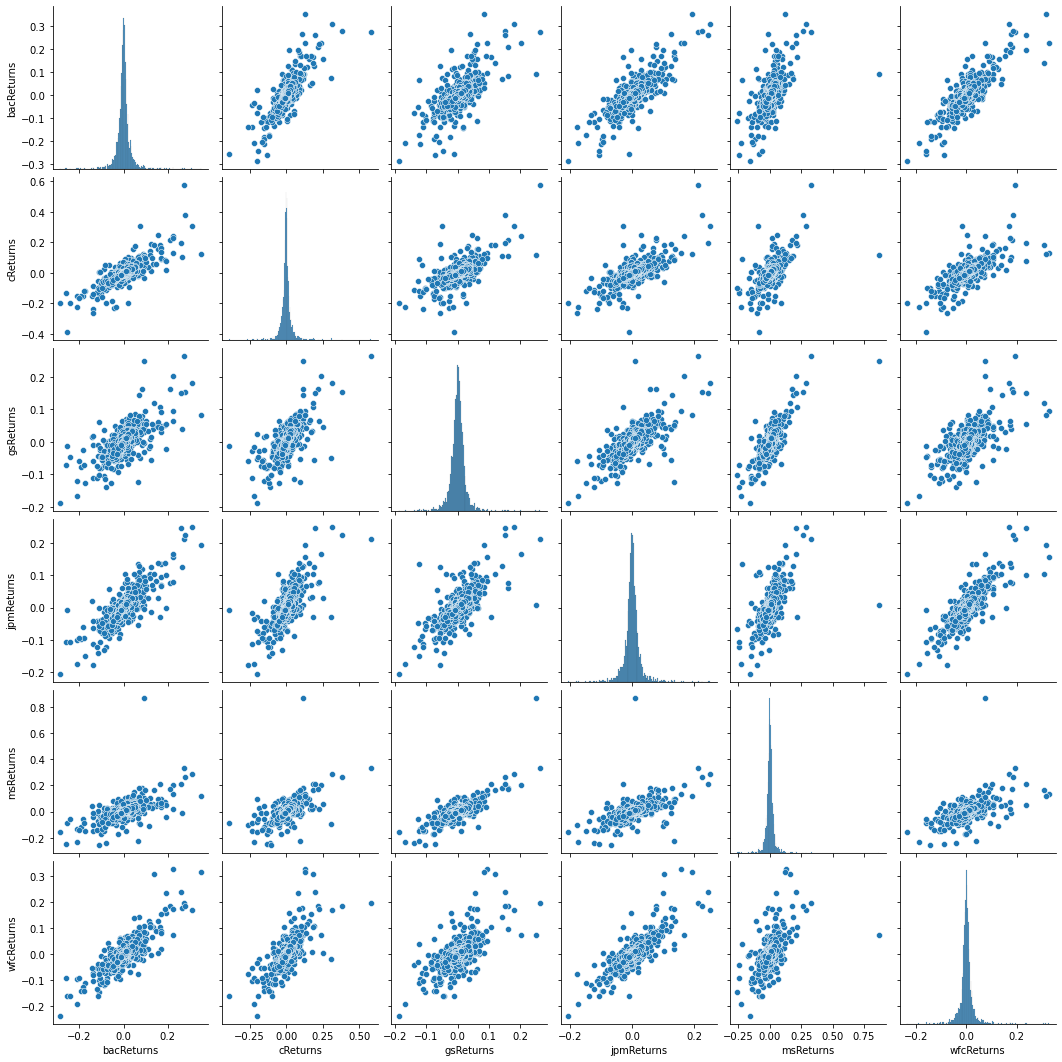

In [46]:
sns.pairplot(data=returns[1:])

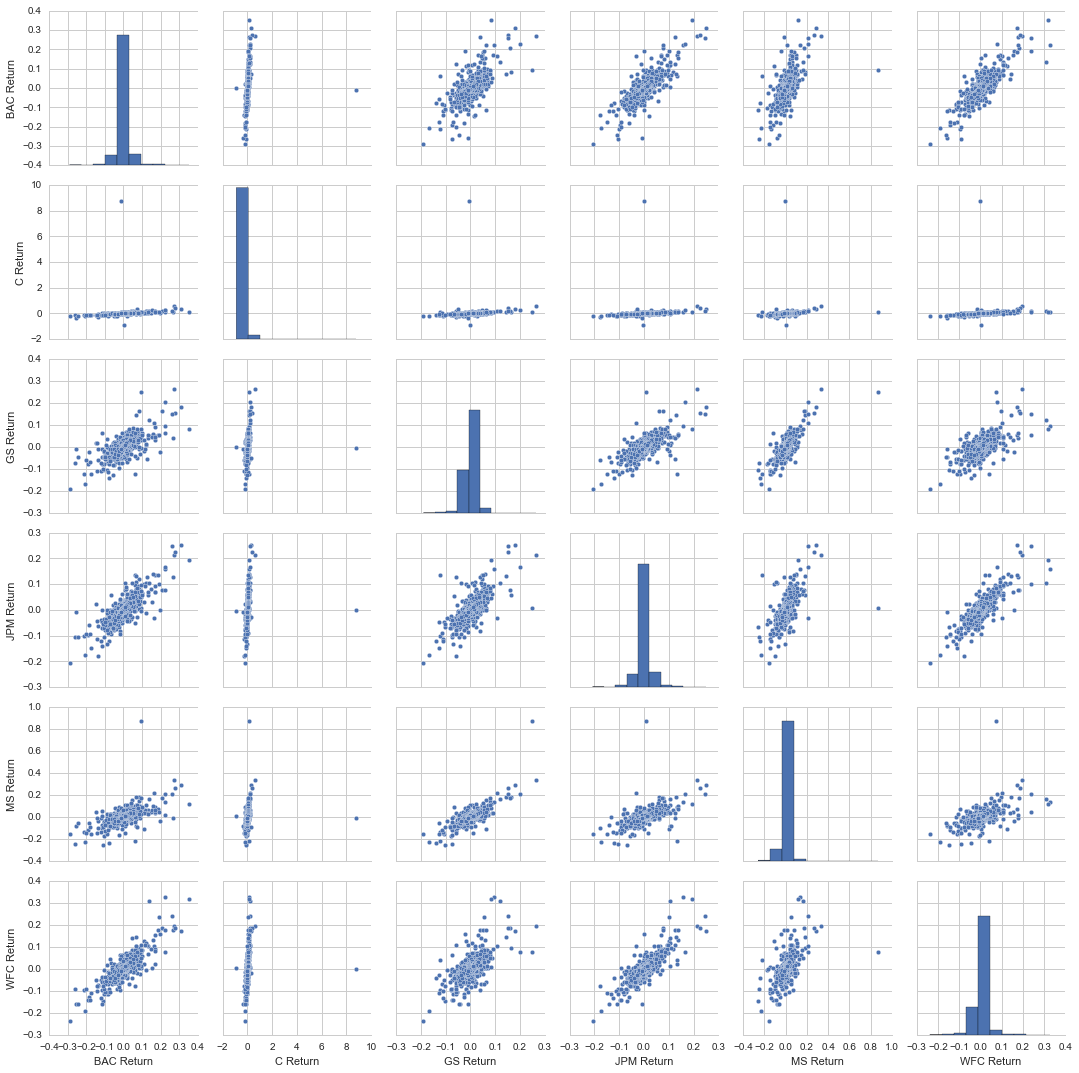

* See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [62]:
returns.idxmin()

bacReturns   2009-01-20
cReturns     2009-02-27
gsReturns    2009-01-20
jpmReturns   2009-01-20
msReturns    2008-10-09
wfcReturns   2009-01-20
dtype: datetime64[ns]

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

* See Solution for details

In [63]:
returns.idxmax()

bacReturns   2009-04-09
cReturns     2008-11-24
gsReturns    2008-11-24
jpmReturns   2009-01-21
msReturns    2008-10-13
wfcReturns   2008-07-16
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [65]:
returns.std()

bacReturns    0.036647
cReturns      0.038672
gsReturns     0.025390
jpmReturns    0.027667
msReturns     0.037819
wfcReturns    0.030238
dtype: float64

BAC Return    0.036650
C Return      0.179969
GS Return     0.025346
JPM Return    0.027656
MS Return     0.037820
WFC Return    0.030233
dtype: float64

In [77]:
returns['2015-01-01':'2015-12-31'].std() # Very similar risk profiles, but Morgan Stanley or BofA

bacReturns    0.016163
cReturns      0.015289
gsReturns     0.014046
jpmReturns    0.014017
msReturns     0.016249
wfcReturns    0.012591
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='msReturns', ylabel='Density'>

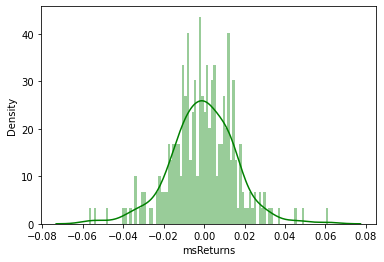

In [74]:
sns.distplot(returns['2015-01-01':'2015-12-31']['msReturns'],color='green',bins=100)

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cReturns', ylabel='Density'>

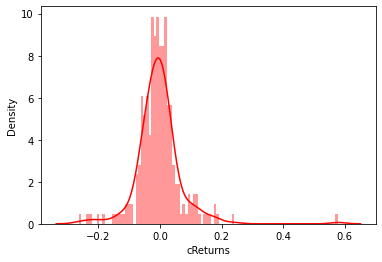

In [78]:
sns.distplot(returns['2008-01-01':'2008-12-31']['cReturns'],color='red',bins=100)

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

In [22]:
a=bank_stocks.xs(key='Open',axis=1,level='Stock Info')
a.head()

Bank Ticker,bac,c,gs,jpm,ms,wfc
Date,,,,,,
2006-01-03,46.919998,490.000000,126.699997,39.830002,57.169998,31.600000
2006-01-04,47.000000,488.600006,127.349998,39.779999,58.700001,31.799999
2006-01-05,46.580002,484.399994,126.000000,39.610001,58.549999,31.500000
2006-01-06,46.799999,488.799988,127.290001,39.919998,58.770000,31.580000
2006-01-09,46.720001,486.000000,128.500000,39.880001,58.630001,31.674999


In [27]:
a.iplot(kind='line')

AttributeError: 'DataFrame' object has no attribute 'iplot'

In [94]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

In [10]:
plt.figure(figsize=(12,6))
BAC['Close']['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close']['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

NameError: name 'plt' is not defined

** Create a heatmap of the correlation between the stocks Close Price.**

<AxesSubplot:>

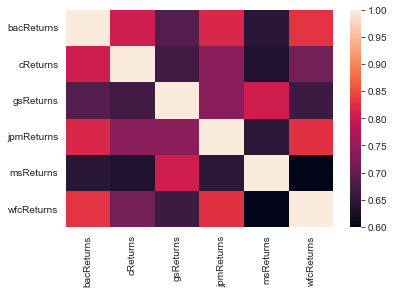

In [97]:
sns.heatmap(returns.corr())

** Optional: Use seaborn's clustermap to cluster the correlations together:**

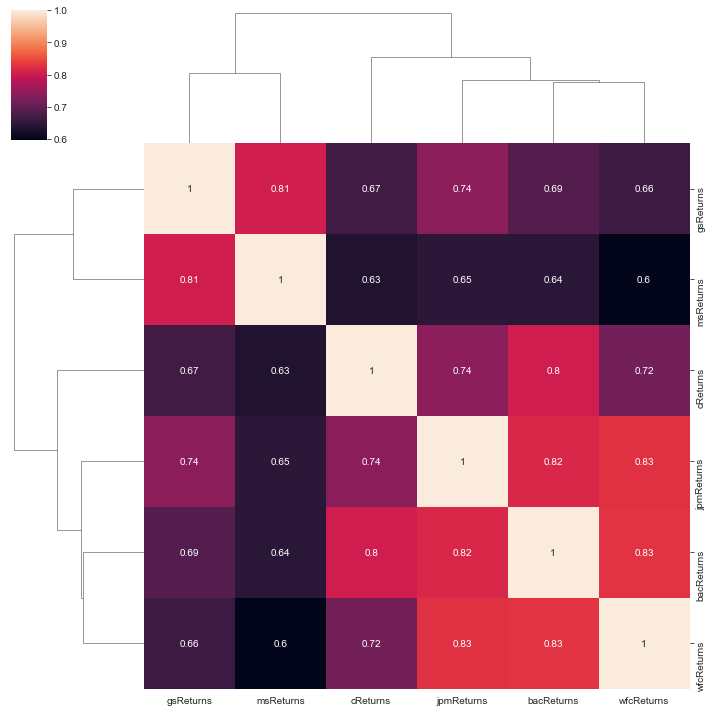

In [100]:
sns.clustermap(returns.corr(),annot=True)

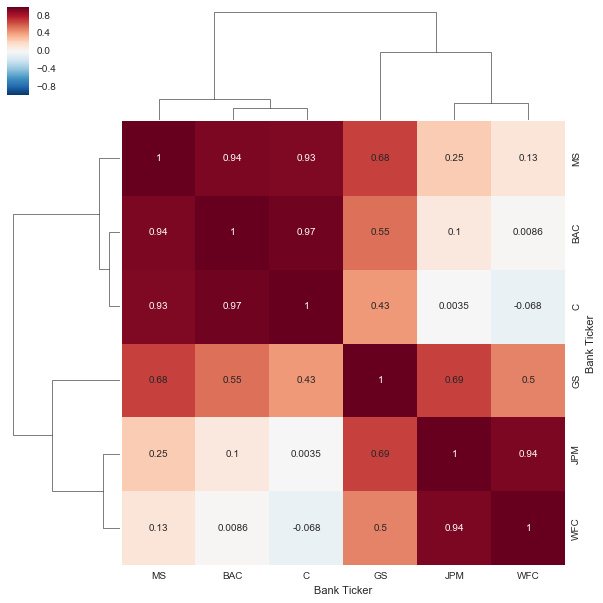

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [103]:
bac['01-01-2015':'01-01-2016'].iplot(kind='candle')

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [105]:
ms['01-01-2015':'01-01-2016'].ta_plot(study='sma')

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [135]:
.ta_plot(study='sma'

# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.